In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE , SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
#read csv
bike_share = pd.read_csv("day.csv")

In [4]:
#head
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#shape
bike_share.shape

(730, 16)

In [6]:
# info
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#describe
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#drop casual and registered dependent variables as we will analyse only cnt
bike_share.drop('casual', axis=1, inplace=True)
bike_share.drop('registered', axis=1, inplace=True)

<Axes: xlabel='weathersit', ylabel='cnt'>

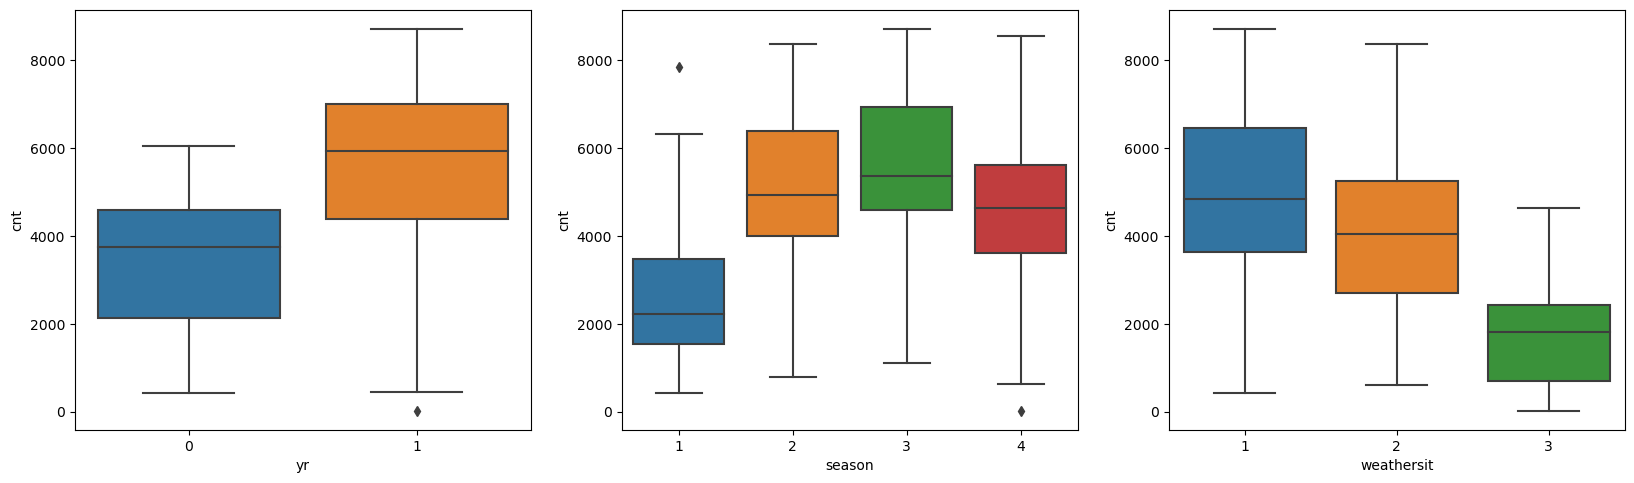

In [9]:
#categorical variables yr,season,weathersit show significant impact
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)

<Axes: xlabel='instant', ylabel='cnt'>

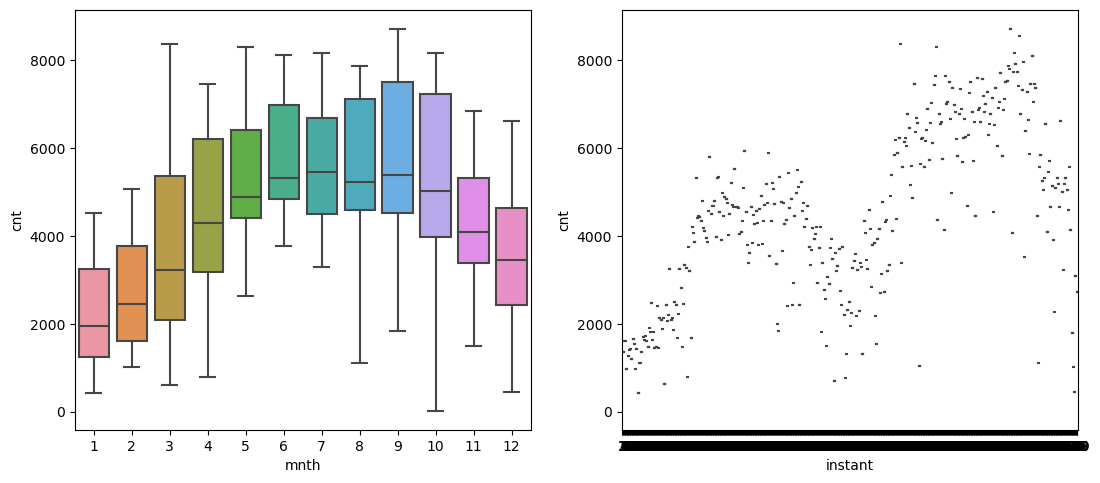

In [10]:
#categorical variables mnth,instant(time/date) show significant impact
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(2,3,2)
sns.boxplot(x = 'instant', y = 'cnt', data = bike_share)

<Axes: xlabel='weekday', ylabel='cnt'>

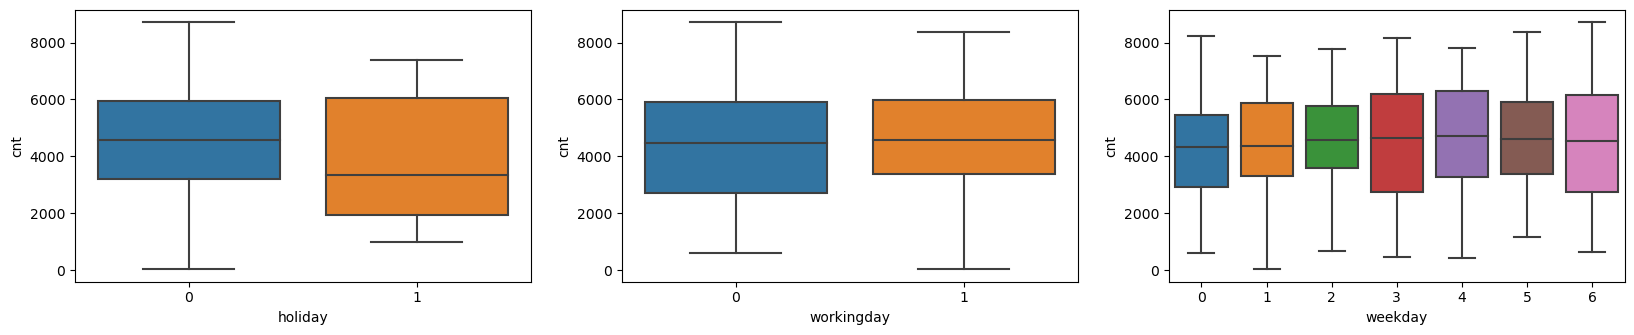

In [11]:
#categorical variables holiday,workingday,weekdaay insignifact impact
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)

In [12]:
#define new column tm  
bike_share['tm']=bike_share['instant']

In [13]:
#drop categorical columns with insignificant impact 
bike_share.drop(['dteday'], axis = 1, inplace = True)
bike_share.drop(['weekday'], axis = 1, inplace = True)
bike_share.drop(['workingday'], axis = 1, inplace = True)
bike_share.drop(['instant'], axis = 1, inplace = True)

In [14]:
#head
bike_share.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,tm
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,5


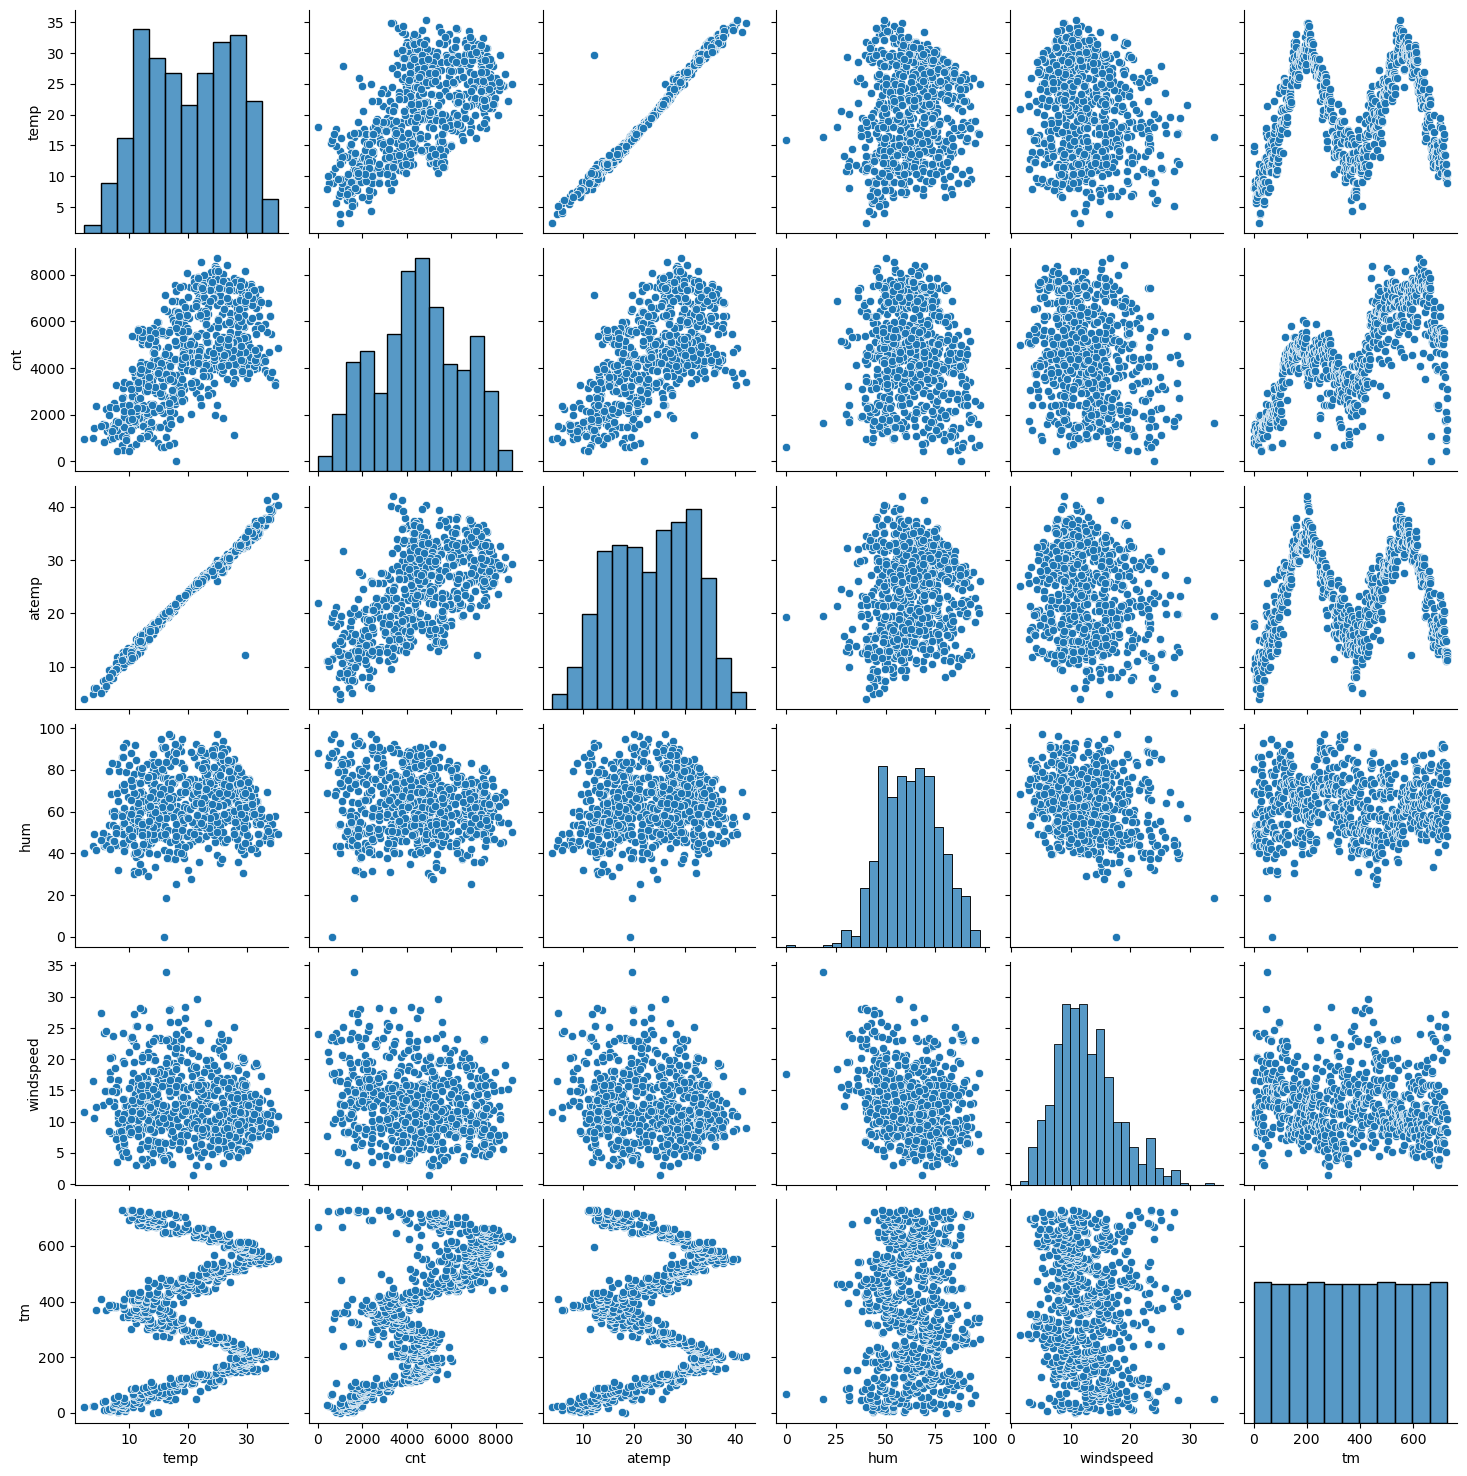

In [15]:
#plotting variables to visualise correlation between them
selected_columns = ['temp','cnt','atemp','hum','windspeed','tm']
subset_data = bike_share[selected_columns]
sns.pairplot(subset_data)
plt.show()

In [16]:
#drop atemp as it is highly correlated to temp
bike_share.drop(['atemp'], axis = 1, inplace = True)

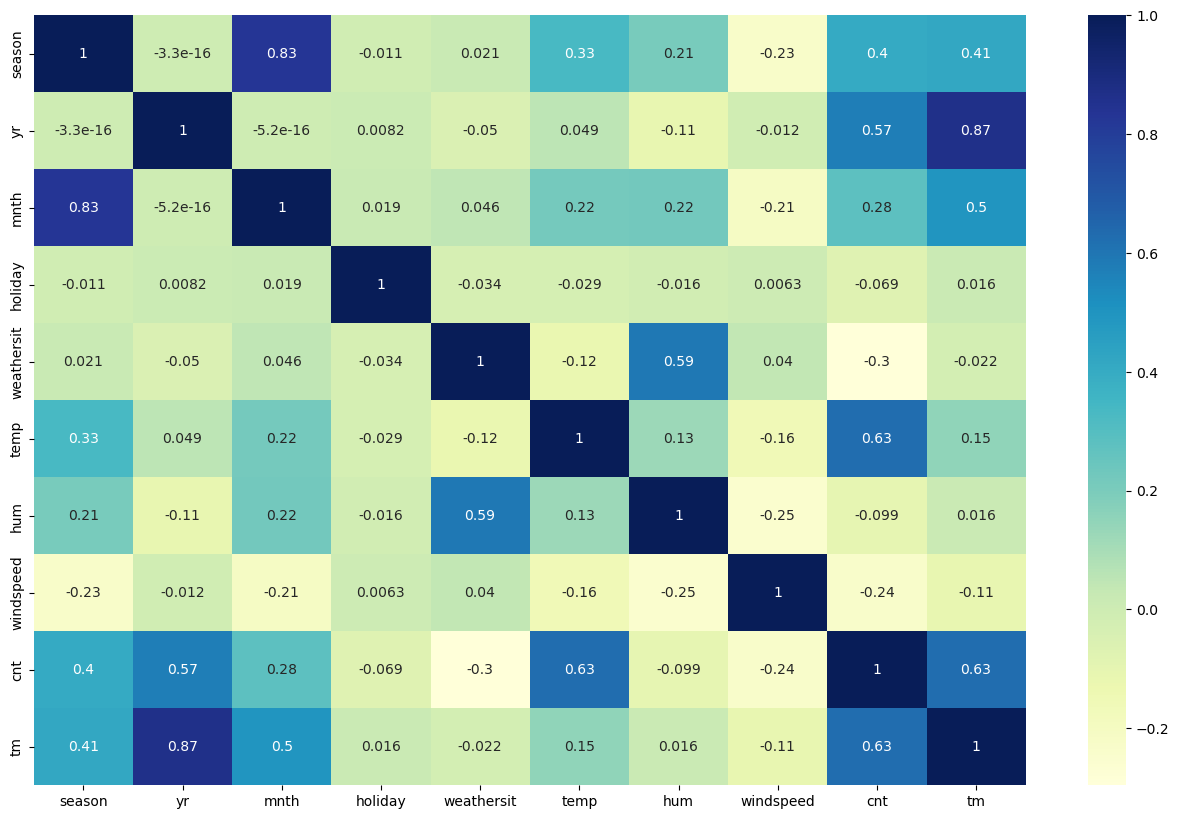

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_share.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [18]:
#we see significant correlation in tm/instance/yr/mnth/season/temp
#we see significant correlation in temp and cnt
#we see significant correlation in humidity and weathersit

#bike_share.drop(['season'], axis = 1, inplace = True)

In [19]:
#creating dummy columns for mnth using month prefix e.g mnth_1,mnth_2....
dummy_df = pd.get_dummies(bike_share['mnth'], prefix='mnth')
dummy_df.drop('mnth_12', axis=1, inplace=True)
bike_share = pd.concat([bike_share, dummy_df], axis=1)
bike_share.drop('mnth', axis=1, inplace=True)

In [20]:
#creating dummy columns for season using season prefix e.g season_1,season_2....
dummy_df = pd.get_dummies(bike_share['season'], prefix='season')
dummy_df.drop('season_4', axis=1, inplace=True)
bike_share = pd.concat([bike_share, dummy_df], axis=1)
bike_share.drop('season', axis=1, inplace=True)

In [21]:
#creating dummy columns for season using season prefix e.g weathersit_1,weathersit_2....
dummy_df = pd.get_dummies(bike_share['weathersit'], prefix='weathersit')
dummy_df.drop('weathersit_3', axis=1, inplace=True)
bike_share = pd.concat([bike_share, dummy_df], axis=1)
bike_share.drop('weathersit', axis=1, inplace=True)

In [22]:
# Doing train_test_split with seed, we specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
scaler = MinMaxScaler()

In [24]:
#min max scaler for  scaling continuous variables
scaled_columns = ['temp', 'windspeed','cnt','tm','hum']
df_train[scaled_columns] = scaler.fit_transform(df_train[scaled_columns])

In [25]:
#check scaling
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,tm,mnth_1,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,season_1,season_2,season_3,weathersit_1,weathersit_2
653,1,0,0.509887,0.575354,0.300794,0.864243,0.896978,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0.827658,0.791209,0,0,0,...,1,0,0,0,0,0,0,1,1,0
426,1,0,0.442393,0.640189,0.255342,0.465255,0.585165,0,0,1,...,0,0,0,0,0,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1.000000,0,0,0,...,0,0,0,0,0,1,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0.662088,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [26]:
#describe dataset
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,tm,mnth_1,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,season_1,season_2,season_3,weathersit_1,weathersit_2
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.505414,0.088235,0.066667,0.098039,...,0.076471,0.096078,0.080392,0.086275,0.086275,0.243137,0.245098,0.262745,0.627451,0.343137
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.288281,0.283915,0.249689,0.297660,...,0.266010,0.294988,0.272166,0.281045,0.281045,0.429398,0.430568,0.440557,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.255838,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.510989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.759272,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# selected_columns = ['temp','hum','windspeed','tm','cnt']
# subset_data = bike_share[selected_columns]
# sns.pairplot(subset_data)
# plt.show()

In [28]:
# plt.figure(figsize=[6,6])
# plt.scatter(df_train.temp, df_train.cnt)
# plt.show()

In [29]:
#get X and y data set to train the model 
y_train = df_train.pop('cnt')
X_train = df_train

In [30]:


# # Add a constant
# X_train_lm = sm.add_constant(X_train[['temp']])

# # Create a first fitted model
# lr = sm.OLS(y_train, X_train_lm).fit()

In [31]:
# print(lr.params)

In [32]:
# plt.scatter(X_train_lm.iloc[:, 1], y_train)
# plt.plot(X_train_lm.iloc[:, 1], 0.17 + 0.64*X_train_lm.iloc[:, 1], 'r')
# plt.show()

In [33]:
#Train and print model summary
#Show error term distribution
#return model for selected_coulumns
def train_print_summary(column_list,X_train,y_train):
    X_train_lm = X_train[column_list]
    X_train_lm = sm.add_constant(X_train_lm)    
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    y_train_cnt = lr.predict(X_train_lm)
    fig = plt.figure()
    sns.distplot((y_train - y_train_cnt), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)
    return lr
  

In [34]:
# Check for the VIF values of the feature variables.   
def vif_print_summary(column_list,X_train):
    X_train_vif=X_train[column_list]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)


In [35]:
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,tm,mnth_1,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,season_1,season_2,season_3,weathersit_1,weathersit_2
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,20.815737,61.961883,12.600130,4546.981735,356.776256,0.077626,0.100457,0.054795,...,0.105023,0.059361,0.086758,0.082192,0.073059,0.255708,0.264840,0.246575,0.652968,0.319635
std,0.500722,0.188034,7.689600,14.456669,4.984858,1898.633630,213.665198,0.268194,0.301297,0.228100,...,0.307285,0.236840,0.282125,0.275286,0.260830,0.437258,0.442259,0.432005,0.477117,0.467403
min,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.093750,51.166700,9.021282,3303.500000,171.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,20.807500,60.916700,12.167200,4579.000000,349.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,27.401653,72.192050,15.395629,5869.500000,537.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,730.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


        Features    VIF
0             tm  23.15
1           temp  17.31
8   weathersit_1  13.70
2             yr  10.92
12  weathersit_2   7.65
7      windspeed   4.37
5       season_3   3.95
3       season_1   3.63
4         mnth_1   2.38
9         mnth_8   1.94
6         mnth_2   1.89
10        mnth_9   1.54
11        mnth_6   1.33
R2 and Error Terms on Training Data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.30e-182
Time:                        19:41:18   Log-Likelihood:                 492.30
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     496   BIC:                            -89

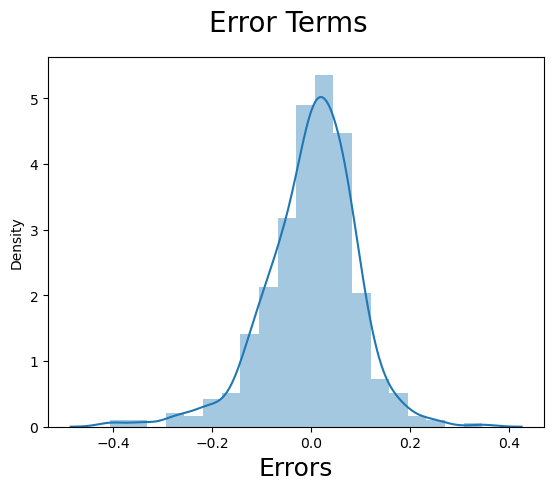

In [36]:

model_column_list=[ 'tm', 'temp','yr', 'season_1','mnth_1', 'season_3', 'mnth_2', 'windspeed', 'weathersit_1', 'mnth_8', 'mnth_9', 'mnth_6', 'weathersit_2']
vif_print_summary(model_column_list,X_train)

print('R2 and Error Terms on Training Data')
lr=train_print_summary(model_column_list,X_train,y_train)

In [37]:
#Scaling test set adding constant
df_test[scaled_columns] = scaler.transform(df_test[scaled_columns])
y_test = df_test.pop('cnt')
X_test = df_test[model_column_list]
X_test_lm = sm.add_constant(X_test)

In [38]:
#prediction on test set
y_pred=lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

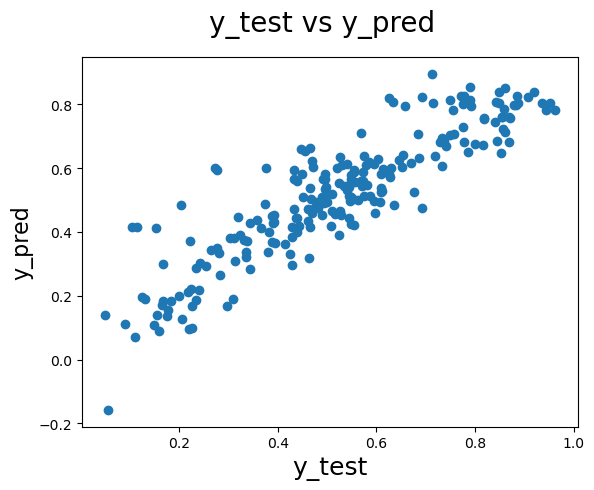

In [39]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

R2 and Error Terms on Test Data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     68.64
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.22e-67
Time:                        19:41:19   Log-Likelihood:                 206.61
No. Observations:                 219   AIC:                            -385.2
Df Residuals:                     205   BIC:                            -337.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           

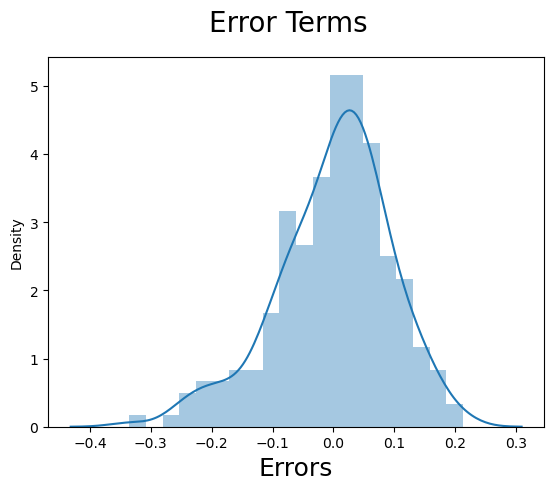

In [40]:
print('R2 and Error Terms on Test Data')
train_print_summary(model_column_list,X_test,y_test)

In [41]:
#calculate r2 on test set
r2_score=r2_score(y_test, y_pred)
print('R2 on test=',r2_score)

R2 on test= 0.7917036301092514


In [42]:
# Get the mean squared error
rsme=np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print('RSME=', rsme)

RSME= 0.09946458878782669


In [43]:
#Get k best feature for model 
def select_k_best_with_lr(X_train, y_train, n_features_to_select):
    model = LinearRegression()
    selector = SelectKBest(score_func=f_regression, k=n_features_to_select)
    X_train_selected = selector.fit_transform(X_train, y_train)
    model.fit(X_train_selected, y_train)
    return model, selector.get_support()

In [44]:
#rfe method to get best model with number features not suggested
def rfe_with_lr(X_train, y_train):
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    return model, rfe.support_

In [45]:
#rfe method to get best model with number features suggested
def rfe_with_lr_x(X_train, y_train, n_features_to_select):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    return model, rfe.support_

In [46]:
# Assuming you have X_train and y_train dataframes
n_features_to_select = 5  # Specify the number of features to select
selected_model, selected_features_mask = rfe_with_lr(X_train, y_train)

In [47]:
selected_features = X_train.columns[selected_features_mask]
print("Selected features:", selected_features)

Selected features: Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_9', 'mnth_10',
       'season_1', 'season_3', 'weathersit_1', 'weathersit_2'],
      dtype='object')


In [48]:
# Assuming you have X_train and y_train dataframes
n_features_to_select = 13  # Specify the number of features to select
selected_model, selected_features_mask = select_k_best_with_lr(X_train, y_train, n_features_to_select)
selected_features = X_train.columns[selected_features_mask]
print("Selected features:", selected_features)

Selected features: Index(['yr', 'temp', 'windspeed', 'tm', 'mnth_1', 'mnth_2', 'mnth_6', 'mnth_8',
       'mnth_9', 'season_1', 'season_3', 'weathersit_1', 'weathersit_2'],
      dtype='object')
